In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import utils
src_path = utils.src_path()

In [3]:
import sys
sys.path.insert(1, src_path)
import data_loader as dl # type: ignore
import model_training as mt # type: ignore

In [4]:
df = dl.load_and_preprocess_data(r"../data/Titanic-Dataset.csv")

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,FamilySize,IsAlone,Title,TitleEncoded,AgeCategory,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,Mr,4,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0,Mrs,5,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,Miss,3,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1,1,0,Mrs,5,0,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,Mr,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,0,0,1,Rare,6,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,1,0,1,Miss,3,3,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,3,0,Miss,3,0,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,1,0,1,Mr,4,0,2


In [6]:
train_df = df
train_df = train_df.drop(columns=['Survived','PassengerId','Name','Age','Ticket','Cabin','Fare','Embarked','Title','FamilySize'])
train_df


,Pclass,Sex,SibSp,Parch,HasCabin,IsAlone,TitleEncoded,AgeCategory,FareCategory
0,3,1,1,0,0,0,4,0,1
1,1,0,1,0,1,0,5,0,2
2,3,0,0,0,0,1,3,0,1
3,1,0,1,0,1,0,5,0,2
4,3,1,0,0,0,1,4,0,1
...,...,...,...,...,...,...,...,...,...
886,2,1,0,0,0,1,6,0,1
887,1,0,0,0,1,1,3,3,2
888,3,0,1,2,0,0,3,0,2
889,1,1,0,0,1,1,4,0,2


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Pclass        891 non-null    int64
 1   Sex           891 non-null    int64
 2   SibSp         891 non-null    int64
 3   Parch         891 non-null    int64
 4   HasCabin      891 non-null    int64
 5   IsAlone       891 non-null    int64
 6   TitleEncoded  891 non-null    int64
 7   AgeCategory   891 non-null    int64
 8   FareCategory  891 non-null    int64
dtypes: int64(9)
memory usage: 62.8 KB


### Training each model

In [8]:
Logistic_Regression = mt.train_logistic_regression_model(df)
print("Accuracy: ",mt.evaluate_model(Logistic_Regression, df))

Accuracy:  0.8044692737430168


In [9]:
SVM = mt.train_svm_model(df)
print("Accuracy: ",mt.evaluate_model(SVM, df))

Accuracy:  0.7821229050279329


In [10]:
Random_Forest = mt.train_random_forest_model(df)
print("Accuracy: ",mt.evaluate_model(Random_Forest, df))

Accuracy:  0.8212290502793296


In [11]:
KNN = mt.train_knn_model(df)
print("Accuracy: ",mt.evaluate_model(KNN, df))

Accuracy:  0.8100558659217877


In [12]:
XGBoost = mt.train_xgboost_model(df)
print("Accuracy: ",mt.evaluate_model(XGBoost, df))

Accuracy:  0.8100558659217877


In [13]:
SVC = mt.train_svc_model(df)
print("Accuracy: ",mt.evaluate_model(SVC, df))

Accuracy:  0.8212290502793296


In [14]:
Decision_Tree = mt.train_decision_tree_model(df)
print("Accuracy: ",mt.evaluate_model(Decision_Tree, df))

Accuracy:  0.8156424581005587


In [15]:
AdaBoost = mt.train_ada_boost_model(df)
print("Accuracy: ",mt.evaluate_model(AdaBoost, df))

Accuracy:  0.8044692737430168


In [16]:
Gradient_Boosting = mt.train_gradient_boosting_model(df)
print("Accuracy: ",mt.evaluate_model(Gradient_Boosting, df))

Accuracy:  0.7988826815642458


In [17]:
model_names = ['Logistic_Regression', 'SVM', 'Random_Forest', 'KNN', 'XGBoost', 'SVC', 'Decision_Tree', 'AdaBoost', 'Gradient_Boosting']
accuracies = [mt.evaluate_model(Logistic_Regression, df), mt.evaluate_model(SVM, df), mt.evaluate_model(Random_Forest, df), 
              mt.evaluate_model(KNN, df), mt.evaluate_model(XGBoost, df), mt.evaluate_model(SVC, df),
              mt.evaluate_model(Decision_Tree, df), mt.evaluate_model(AdaBoost, df), mt.evaluate_model(Gradient_Boosting, df)]

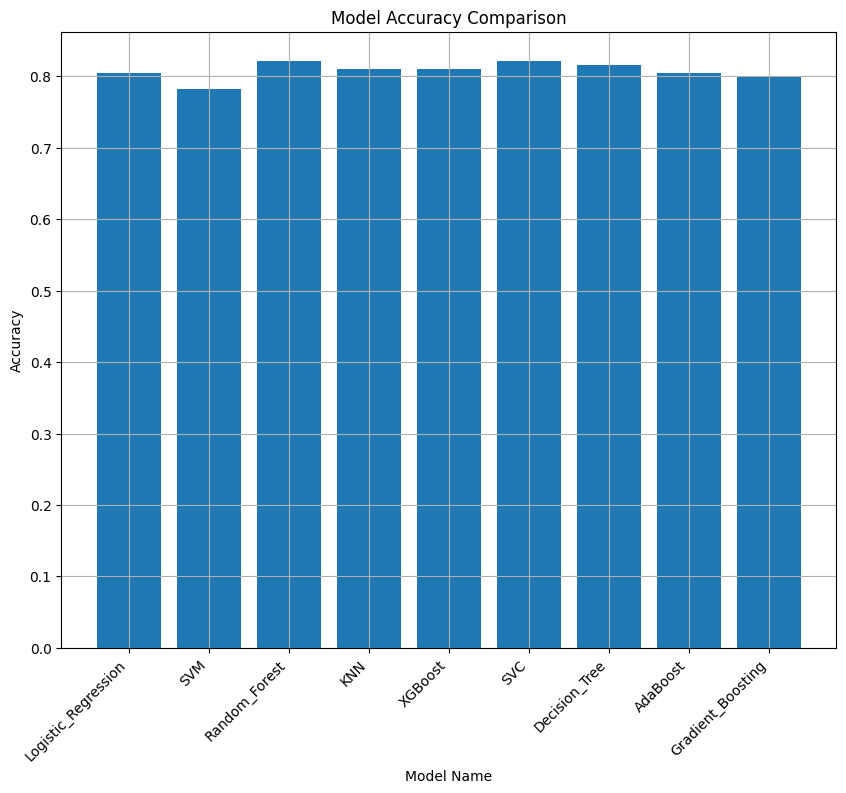

In [18]:
plt.figure(figsize=(10, 8))
plt.bar(model_names, accuracies)
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

From the above barplot, we can clearly see that the accuracy of the SVC classifier is best out of all other classifiers..<br>Therefore, we will select the SVC classifier as our saved model for future predictions.

In [19]:
predictions = mt.predict(SVC, df)
print(predictions)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1
 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1
 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 

In [20]:
print(len(predictions))

891
